<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/ConcentricCir2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from keras.utils.vis_utils import plot_model

In [25]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/3.concertriccir2.csv",header=None)

In [26]:
data.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [27]:
data.shape

(500, 3)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


Balanced data. Multi class classification

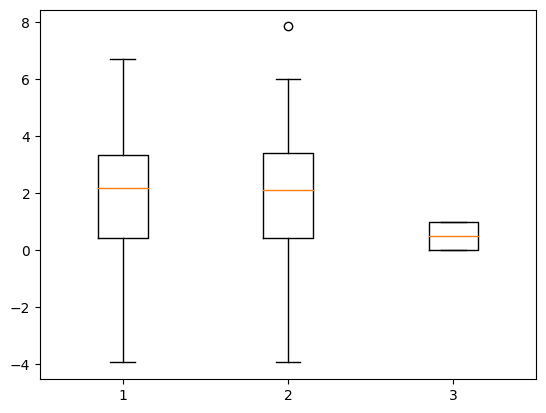

In [29]:
plt.boxplot(data)
plt.show()

There are some outliers.

In [30]:
x = data[[0,1]]
y = data[2]

In [31]:
y = y.astype(int)

Output needs to be int for comparision with predicted output


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [33]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((400, 2), (100, 2), 400, 100)

In [34]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

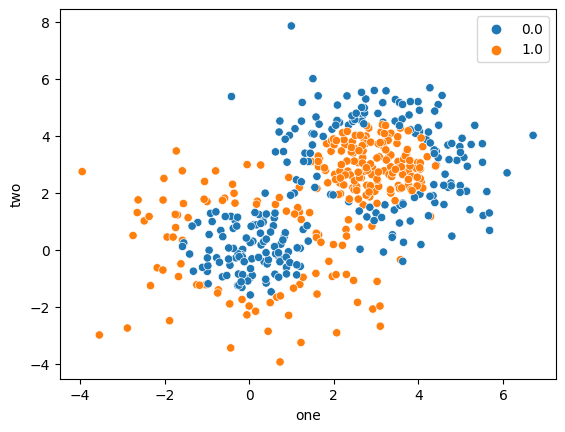

In [35]:
# code to visualize the data
data.columns = ["one","two","three"]
import seaborn as sns
sns.scatterplot(data=data, x="one",y="two",hue="three")
plt.legend()

In [36]:
model=Sequential()
model.add(Dense(5,activation="tanh",input_dim=2))
model.add(Dense(3,activation="tanh"))
model.add(Dense(3,activation="sigmoid"))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 3)                 12        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


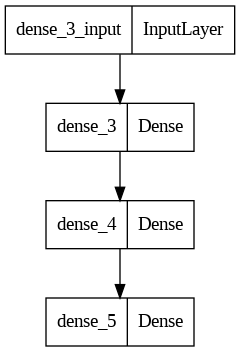

In [38]:
plot_model(model)

In [39]:
model.layers[0].get_weights()

[array([[-0.74153256,  0.01215464,  0.89006984, -0.48724097,  0.04749727],
        [ 0.04049981, -0.5724778 ,  0.6003885 , -0.78307647,  0.14430773]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [40]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [41]:
history = model.fit(x_train,y_train,batch_size=10,epochs=150,validation_split=0.2)

Epoch 1/150
32/32 [==============================] - 1s 8ms/step - loss: 1.1046 - accuracy: 0.4219 - val_loss: 1.0812 - val_accuracy: 0.4500
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 1.0225 - accuracy: 0.4281 - val_loss: 1.0100 - val_accuracy: 0.4250
Epoch 3/150
32/32 [==============================] - 0s 3ms/step - loss: 0.9587 - accuracy: 0.4125 - val_loss: 0.9532 - val_accuracy: 0.3750
Epoch 4/150
32/32 [==============================] - 0s 3ms/step - loss: 0.9088 - accuracy: 0.4125 - val_loss: 0.9075 - val_accuracy: 0.3625
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.4437 - val_loss: 0.8727 - val_accuracy: 0.4125
Epoch 6/150
32/32 [==============================] - 0s 4ms/step - loss: 0.8417 - accuracy: 0.5500 - val_loss: 0.8457 - val_accuracy: 0.4250
Epoch 7/150
32/32 [==============================] - 0s 4ms/step - loss: 0.8194 - accuracy: 0.5906 - val_loss: 0.8252 - val_accuracy: 0.4750
Epoch 8/150
3

In [42]:
model.layers[0].get_weights()

[array([[-0.8851093 , -0.5185709 ,  1.9270138 , -0.42986828, -0.26341072],
        [-0.17780843, -0.317137  , -0.32471094, -0.9450471 , -0.38003302]],
       dtype=float32),
 array([ 0.92077315,  0.33132613,  0.22702599, -0.1027135 ,  0.6053658 ],
       dtype=float32)]

In [43]:
predict = np.argmax(model.predict(x_test),axis=1) # row wise we want to get the index value of highest probability, so classification prediction done

4/4 [==============================] - 0s 2ms/step


In [44]:
accuracy_score(y_test,predict)

0.74

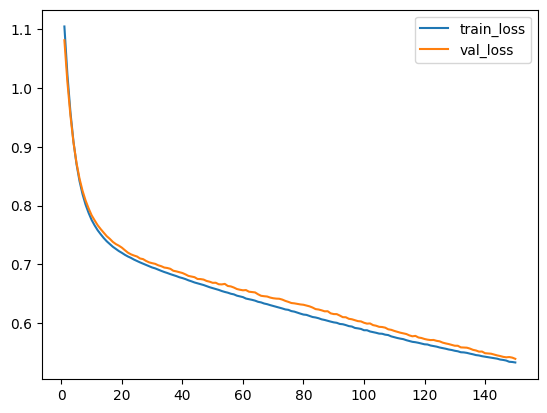

In [45]:
plt.plot(range(1,151),history.history["loss"],label="train_loss")
plt.plot(range(1,151),history.history["val_loss"],label="val_loss")
plt.legend()

9600/9600 [==============================] - 14s 1ms/step


ValueError: ignored

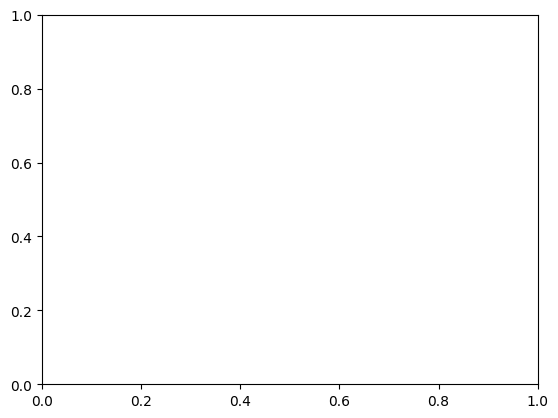

In [47]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)